### DSC530- Term Project

In [293]:
import sys
import numpy as np
import pandas as pd
from pathlib import Path
from thinkplot import thinkplot
from thinkstats2 import thinkstats2
import hypothesis as hypothesis
import statsmodels.formula.api as smf

In [113]:
# Loading specific columns of the file
#ncvs = utils.ReadNCVSData()
file_path = (Path() / "data/33081-0001-Data.csv").resolve()
selected_columns = ['V2026', 'V2071', 'V2072', 'V2073', 'V3014', 'V3072', 'VS0005', 'VS0006', 'VS0152',
                        'V4479_1', 'V2119', 'V3079', 'V2015', 'V2045', 'V4479_1', 'V2049A','V2017']

ncvs = pd.read_csv("../data/33081-0001-Data.csv")
print(ncvs.columns.tolist())

['V2026', 'V2071', 'V2072', 'V2073', 'V3014', 'V3072', 'VS0005', 'VS0006', 'VS0152', 'V4479_1', 'V2119', 'V3079', 'V2015', 'V2045', 'V4479_1', 'V2049A', 'V2017']


In [114]:
# Renaming Columns
ncvs = ncvs.rename(columns={"V2026":"hh_income",
                                  'V2071':'hh_members_above12',
                                  'V2072':'hh_members_under12',
                                  'V2073':'crime_incedents',
                                  'V3014':'age',
                                  'V3072':'have_job_from6months',
                                  'VS0005':'hh_totalmembers',
                                  'VS0006':'hh_totalincidents',
                                  'VS0152':'crime_in_neighborhood',
                                  'V4479_1':'employed',
                                  'V2119':'university',
                                  'V3079':'attending_college',
                                  'V2015':'tenure',
                                  'V2045':'sex',
                                  'V2049A':'race',
                                  'V2017':'location'})
print(ncvs.columns.tolist())

['hh_income', 'hh_members_above12', 'hh_members_under12', 'crime_incedents', 'age', 'have_job_from6months', 'hh_totalmembers', 'hh_totalincidents', 'crime_in_neighborhood', 'employed', 'university', 'attending_college', 'tenure', 'sex', 'employed', 'race', 'location']


In [315]:
# Data manipulation of Income column
ncvs.loc[ncvs.hh_income == 'Residue', 'hh_income'] =  np.nan
ncvs["min_income"] = ncvs["hh_income"].str.split("-", n = 1, expand = True) [0]
ncvs["max_income"] = ncvs["hh_income"].str.split("-", n = 1, expand = True) [1]
ncvs["min_income"] = ncvs["min_income"].str.replace('>','')
ncvs["min_income"] = ncvs["min_income"].str.replace('<','')
ncvs["min_income"] = ncvs["min_income"].str.replace(',','')
ncvs["min_income"] = ncvs["min_income"].str.strip()
ncvs["min_income"] = ncvs["min_income"].fillna(0)
ncvs["min_income"] = pd.to_numeric(ncvs["min_income"], errors='coerce') 
ncvs.loc[ncvs.max_income == '', 'max_income'] =  np.nan
ncvs["max_income"] = ncvs["max_income"].str.strip()
ncvs["max_income"] = ncvs["max_income"].str.replace(',','')
ncvs["max_income"] = ncvs["max_income"].fillna(0)
ncvs["max_income"] = pd.to_numeric(ncvs["max_income"], errors='coerce') 
ncvs["avg_income"] = (ncvs["max_income"] + ncvs["min_income"])/2

In [96]:
ncvs.min_income.unique()

array(['7,500', 'Residue', '40,000', '17,500', '75,000', '5,000',
       '10,000', '20,000', '50,000', '35,000', '12,500', '30,000',
       '25,000', '15,000'], dtype=object)

In [142]:
ncvs.head()

,hh_income,hh_members_above12,hh_members_under12,crime_incedents,age,have_job_from6months,hh_totalmembers,hh_totalincidents,crime_in_neighborhood,employed,university,attending_college,tenure,sex,employed,race,location,min_income,max_income,avg_income
0,"7,500-9,999",3,0,0,15,NaN,2,0,Agree,NaN,No,Regular school,Rented for cash,Female,NaN,White only,Rural,NaN,NaN,NaN
1,"7,500-9,999",3,0,0,13,NaN,2,0,Agree,NaN,No,Regular school,Rented for cash,Female,NaN,White only,Rural,NaN,NaN,NaN
2,NaN,3,0,0,17,NaN,2,0,Blank (SCS Noninterview or Out of Universe),NaN,No,None above schools,Rented for cash,Female,NaN,White only,Rural,NaN,NaN,NaN
3,NaN,3,0,0,13,NaN,2,0,Blank (SCS Noninterview or Out of Universe),NaN,No,None above schools,Rented for cash,Female,NaN,White only,Rural,NaN,NaN,NaN
4,"40,000-49,999",4,0,0,15,NaN,1,0,Blank (SCS Noninterview or Out of Universe),NaN,No,Regular school,Owned/being bght,Male,NaN,White only,Rural,NaN,NaN,NaN


In [117]:
ncvs.hh_income.value_counts().sort_index()

10,000-12,499     168
12,500-14,999     127
15,000-17,499     156
17,500-19,999     180
20,000-24,999     386
25,000-29,999     406
30,000-34,999     337
35,000-39,999     400
40,000-49,999     735
5,000-7,499       114
50,000-74,999    1390
7,500-9,999       102
75,000 >         2681
< 5,000           184
Residue          2975
Name: hh_income, dtype: int64

In [118]:
ncvs.location.value_counts().sort_index()

Rural    2048
Urban    8293
Name: location, dtype: int64

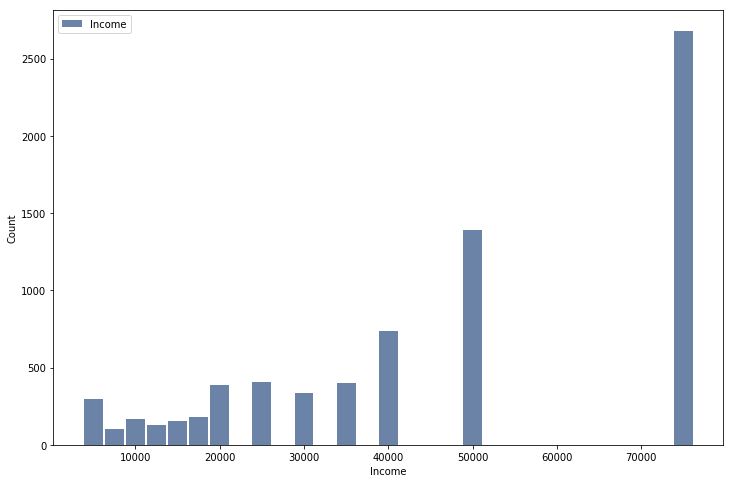

In [208]:
ncvs_withIncome = ncvs[ncvs.min_income > 0]
hist = thinkstats2.Hist(ncvs_withIncome.min_income, label='Income')
thinkplot.figure(figsize=(12,8))
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Income', ylabel='Count')

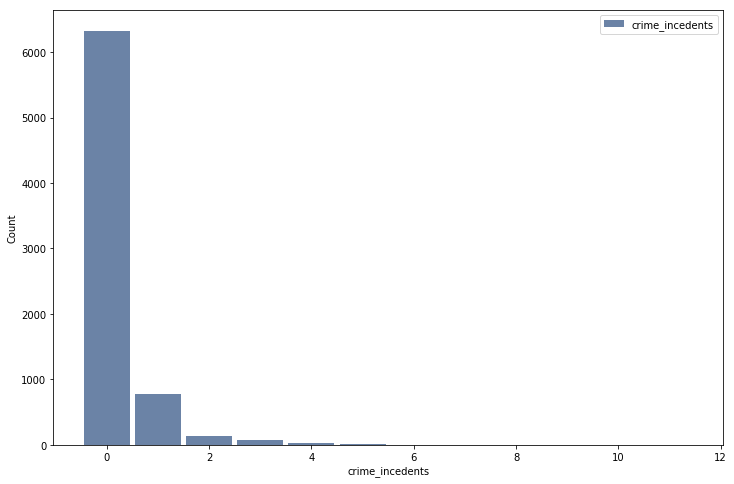

In [209]:
hist =thinkstats2.Hist(ncvs_withIncome.crime_incedents, label='crime_incedents')
thinkplot.figure(figsize=(12,8))
thinkplot.Hist(hist)
thinkplot.Config(xlabel='crime_incedents', ylabel='Count')

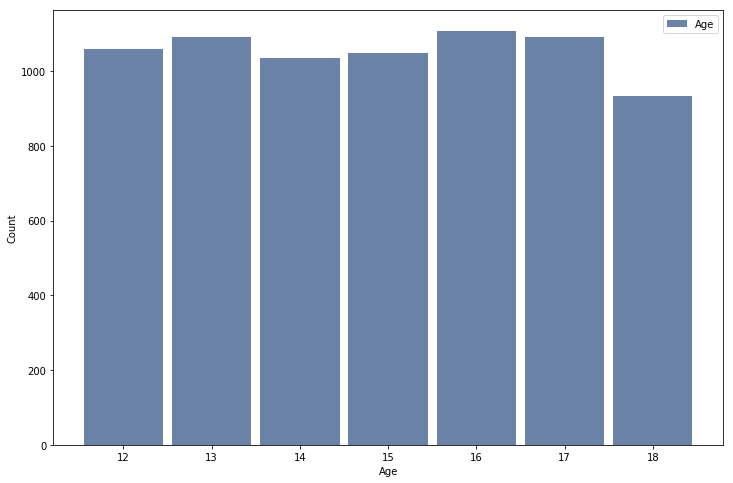

In [210]:
hist =thinkstats2.Hist(ncvs_withIncome.age, label='Age')
thinkplot.figure(figsize=(12,8))
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Age', ylabel='Count')

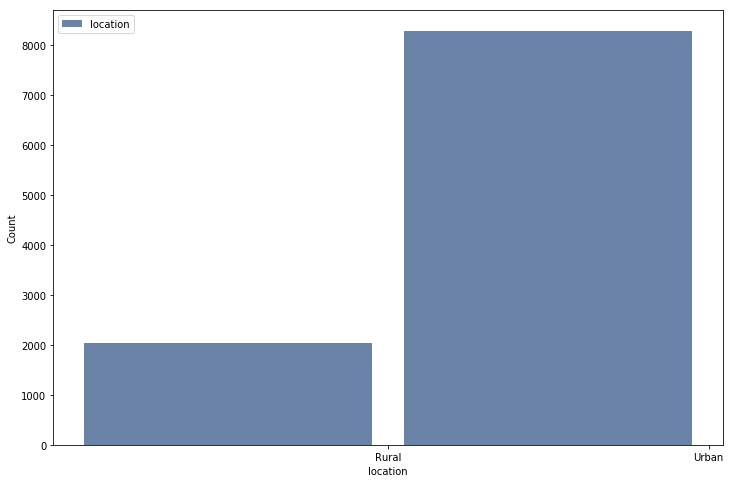

In [173]:
hist =thinkstats2.Hist(ncvs.location, label='location')
thinkplot.figure(figsize=(12,8))
thinkplot.Hist(hist)
thinkplot.Config(xlabel='location', ylabel='Count')

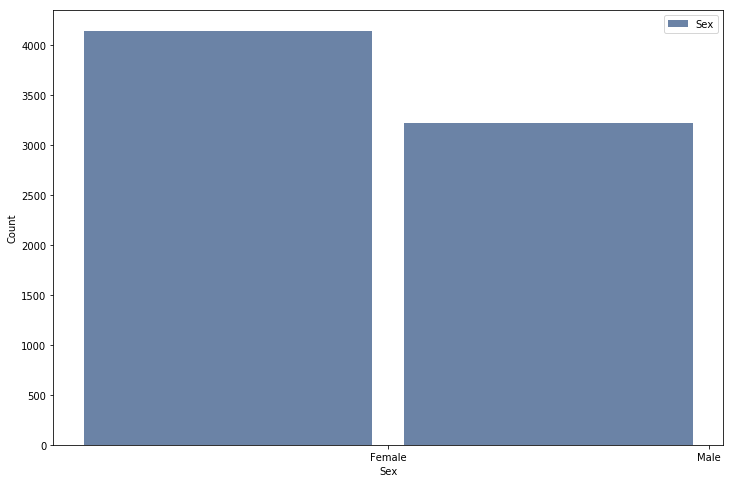

In [211]:
hist =thinkstats2.Hist(ncvs_withIncome.sex, label='Sex')
thinkplot.figure(figsize=(12,8))
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Sex', ylabel='Count')

In [214]:
mean = ncvs_withIncome.min_income.mean(skipna =True)
mode = ncvs_withIncome.min_income.mode()
var = ncvs_withIncome.min_income.var(skipna =True)
std = ncvs_withIncome.min_income.std(skipna =True)
print('Mean:{0}'.format(mean))
print('Mode:{0}'.format(mode))
print('Variance:{0}'.format(var))
print('Standard Deviation:{0}'.format(std))
ncvs_withIncome.min_income.describe()

Mean:47918.47678522943
Mode:0    75000
dtype: int64
Variance:564761207.7813498
Standard Deviation:23764.705085090995


count     7366.000000
mean     47918.476785
std      23764.705085
min       5000.000000
25%      30000.000000
50%      50000.000000
75%      75000.000000
max      75000.000000
Name: min_income, dtype: float64

In [220]:
mean = ncvs_withIncome.hh_totalincidents.mean(skipna =True)
mode = ncvs_withIncome.hh_totalincidents.mode()
var = ncvs_withIncome.hh_totalincidents.var(skipna =True)
std = ncvs_withIncome.hh_totalincidents.std(skipna =True)
print('Mean:{0}'.format(mean))
print('Mode:{0}'.format(mode))
print('Variance:{0}'.format(var))
print('Standard Deviation:{0}'.format(std))
ncvs_withIncome.hh_totalincidents.describe()

Mean:0.0534890035297312
Mode:0    0
dtype: int64
Variance:0.09163955636242042
Standard Deviation:0.30272026090504817


count    7366.000000
mean        0.053489
std         0.302720
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        10.000000
Name: hh_totalincidents, dtype: float64

In [218]:
mean = ncvs_withIncome.age.mean(skipna =True)
mode = ncvs_withIncome.age.mode()
var = ncvs_withIncome.age.var(skipna =True)
std = ncvs_withIncome.age.std(skipna =True)
print('Mean:{0}'.format(mean))
print('Mode:{0}'.format(mode))
print('Variance:{0}'.format(var))
print('Standard Deviation:{0}'.format(std))
ncvs_withIncome.hh_totalincidents.describe()

Mean:14.958050502307902
Mode:0    16
dtype: int64
Variance:3.9084911887594678
Standard Deviation:1.9769904371947447


count    7366.000000
mean        0.053489
std         0.302720
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        10.000000
Name: hh_totalincidents, dtype: float64

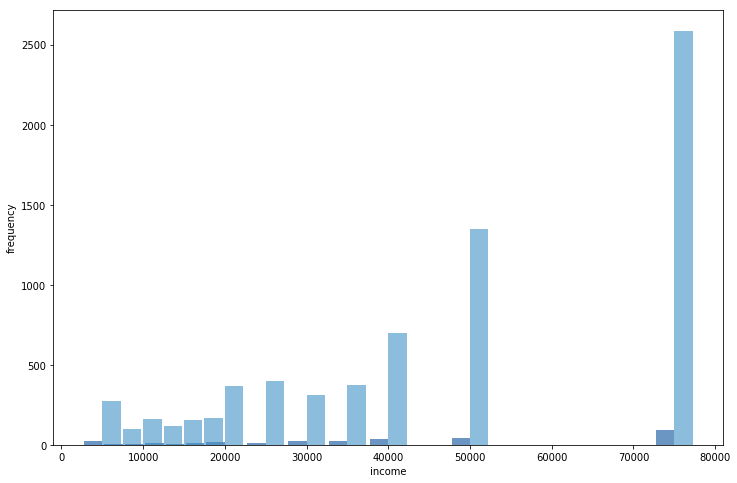

<Figure size 576x432 with 0 Axes>

In [235]:
ncvs_crime = ncvs_withIncome[ncvs_withIncome.hh_totalincidents > 0]
ncvs_nocrime = ncvs_withIncome[ncvs_withIncome.hh_totalincidents == 0]
ncvs_crime_hist = thinkstats2.Hist(ncvs_crime.min_income)
ncvs_nocrime_hist = thinkstats2.Hist(ncvs_nocrime.min_income)
thinkplot.figure(figsize=(12,8))
thinkplot.PrePlot(2)
thinkplot.Hist(ncvs_crime_hist, align='right')
thinkplot.Hist(ncvs_nocrime_hist, align='left')
thinkplot.Show(xlabel='income', ylabel='frequency')

Using pg. 29 of your text as an example, compare two scenarios in your data using a PMF. Reminder, this isn’t comparing two variables against each other – it is the same variable, but a different scenario. Almost like a filter. The example in the book is first babies compared to all other babies, it is still the same variable, but breaking the data out based on criteria we are exploring (Chapter 3).o	Using pg. 29 of your text as an example, compare two scenarios in your data using a PMF. Reminder, this isn’t comparing two variables against each other – it is the same variable, but a different scenario. Almost like a filter. The example in the book is first babies compared to all other babies, it is still the same variable, but breaking the data out based on criteria we are exploring (Chapter 3).

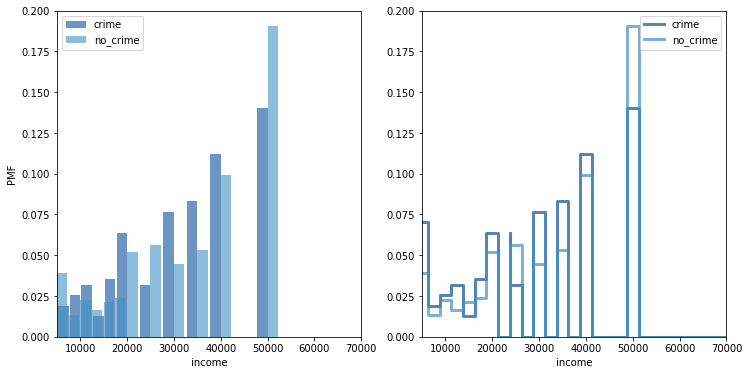

<Figure size 576x432 with 0 Axes>

In [258]:
width=0.50
axis=[5000, 70000, 0, 0.20]
ncvs_crime_pmf = thinkstats2.Pmf(ncvs_crime.min_income, label='crime')
ncvs_nocrime_pmf = thinkstats2.Pmf(ncvs_nocrime.min_income, label='no_crime')
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(ncvs_crime_pmf, align='right')
thinkplot.Hist(ncvs_nocrime_pmf, align='left')
thinkplot.Config(xlabel='income',ylabel='PMF', axis=axis)
thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([ncvs_crime_pmf, ncvs_nocrime_pmf])
thinkplot.Show(xlabel='income', axis=axis)

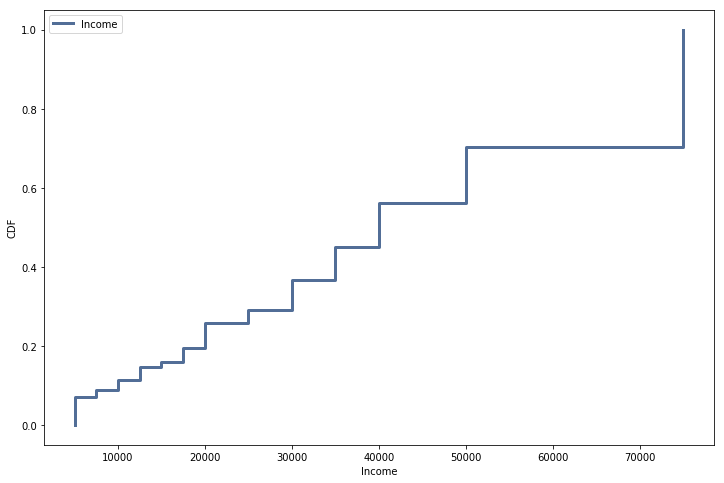

<Figure size 576x432 with 0 Axes>

In [260]:
cdf = thinkstats2.Cdf(ncvs_crime.min_income, label='Income')
thinkplot.figure(figsize=(12,8))
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel='Income', ylabel='CDF')

60% of crime incidents offenders falls under Income income less than $40,000.

Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen (Chapter 5).

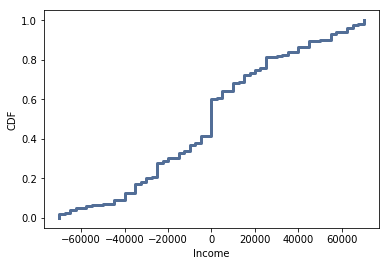

<Figure size 576x432 with 0 Axes>

In [316]:
diffs = ncvs_crime.min_income.diff()
cdf = thinkstats2.Cdf(diffs, label='actual')
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel='Income', ylabel='CDF')

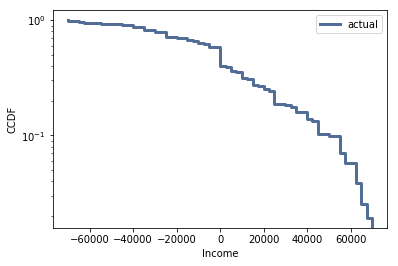

<Figure size 576x432 with 0 Axes>

In [263]:
thinkplot.Cdf(cdf, complement=True)
thinkplot.Show(xlabel='Income',ylabel='CCDF',yscale='log')

Create two scatter plots comparing two variables and provide your analysis on correlation and causation. Remember, covariance, Pearson’s correlation, and Non-Linear Relationships should also be considered during your analysis (Chapter 7).

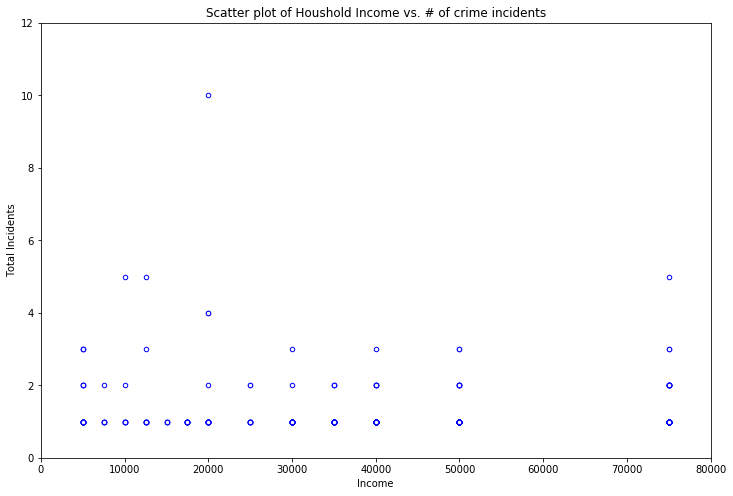

<Figure size 576x432 with 0 Axes>

In [318]:
ncvs_crime_subset1 = ncvs_crime.dropna(subset=['min_income', 'hh_totalincidents'])
incomes = ncvs_crime_subset1.min_income
totalincidents = ncvs_crime_subset1.hh_totalincidents
thinkplot.figure(figsize=(12,8))
thinkplot.Scatter(incomes,totalincidents, alpha= 1.0, color='white',s= 20, edgecolors='blue' )
thinkplot.Show(xlabel='Income',
                     ylabel='Total Incidents',
                     xlim=[0, 80000],
                     ylim=[0, 12],
                     legend=False,
                     title="Scatter plot of Houshold Income vs. # of crime incidents")


In [274]:
print('Pearson’s Correlations {0} '.format(thinkstats2.Corr(incomes, totalincidents)))

Pearson’s Correlations -0.09992926318560393 


In [278]:
print('Spearman’s Correlation:{0} '.format(thinkstats2.SpearmanCorr(incomes, totalincidents)))

Spearman’s Correlation:-0.06064205510124054 


The Pearson's correlation is positive, which means there is a positive association and mostly when one variable is high, the other tends to be high.

The Spearman’s correlation is positive, which means there is a positive association and mostly when one variable is high, the other tends to be high.

The Spearman’s correlation is more close to +1 which is also indication that variables are closely related

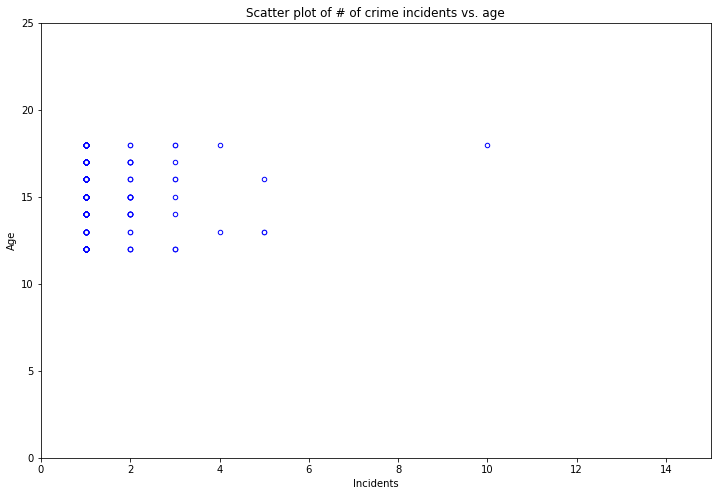

<Figure size 576x432 with 0 Axes>

In [319]:
ncvs_crime_subset2 = ncvs_crime.dropna(subset=['age', 'hh_totalincidents'])
totalincidents = ncvs_crime_subset2.hh_totalincidents
ages = ncvs_crime_subset2.age
thinkplot.figure(figsize=(12,8))
thinkplot.Scatter(totalincidents,ages, alpha= 1.0, color='white',s= 20, edgecolors='blue' )
thinkplot.Show(xlabel='Incidents',
                     ylabel='Age',
                     xlim=[0, 15],
                     ylim=[0, 25],
                     legend=False,
                     title="Scatter plot of # of crime incidents vs. age")


In [276]:
print('Pearson’s Correlations {0} '.format(thinkstats2.Corr(totalincidents, ages)))

Pearson’s Correlations 0.02049608319185341 


In [277]:
print('Spearman’s Correlation:{0} '.format(thinkstats2.SpearmanCorr(totalincidents, ages)))

Spearman’s Correlation:-0.02391163191455039 


The Pearson's correlation is positive, which means there is a positive association and mostly when one variable is high, the other tends to be high.

The Spearman’s correlation is positive, which means there is a positive association and mostly when one variable is high, the other tends to be high.

The Spearman’s correlation is more close to +1 which is also indication that variables are closely related

Conduct a test on your hypothesis using one of the methods covered in Chapter 9.

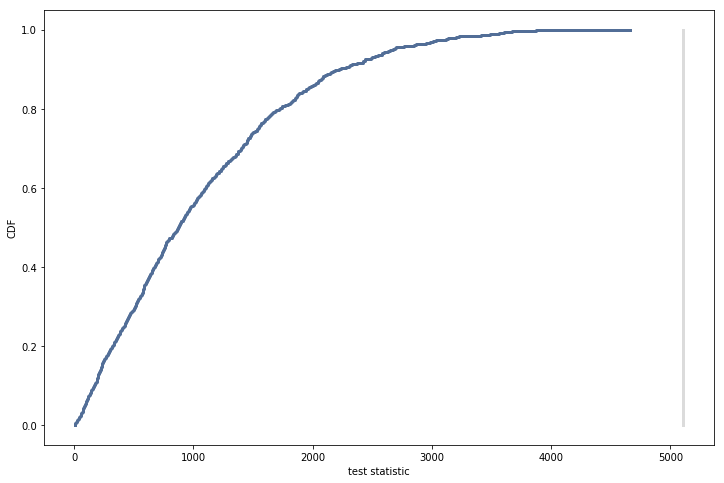

<Figure size 576x432 with 0 Axes>

In [284]:
data = ncvs_crime.min_income.values, ncvs_nocrime.min_income.values
ht = hypothesis.DiffMeansPermute(data)
pvalue = ht.PValue()
thinkplot.figure(figsize=(12,8))
ht.PlotCdf()
thinkplot.Show(xlabel='test statistic',ylabel='CDF')


The CDF does not intersects the observed difference.

For this project, conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables (Chapter 10 & 11).

In [295]:
formula = 'min_income ~ hh_totalincidents'
model = smf.ols(formula, data=ncvs)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             min_income   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1624
Date:                Sat, 01 Jun 2019   Prob (F-statistic):              0.687
Time:                        23:48:29   Log-Likelihood:            -1.2112e+05
No. Observations:               10341   AIC:                         2.422e+05
Df Residuals:                   10339   BIC:                         2.423e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          3.411e+04    294.38

Linear least squares

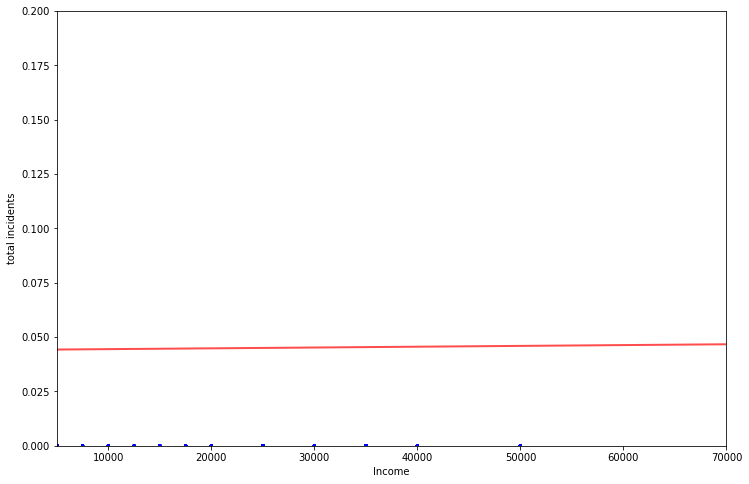

In [314]:
ncvs_crime_subset3 = ncvs.dropna(subset=['min_income', 'hh_totalincidents'])
incomes = ncvs_crime_subset3.min_income
totalincidents = ncvs_crime_subset3.hh_totalincidents
inter, slope = thinkstats2.LeastSquares(incomes, totalincidents)
fit_xs, fit_ys = thinkstats2.FitLine(incomes, inter, slope)
thinkplot.figure(figsize=(12,8))
thinkplot.Scatter(incomes, totalincidents, color='blue', alpha=0.1, s=10)
thinkplot.Plot(fit_xs, fit_ys, color='white', linewidth=3)
thinkplot.Plot(fit_xs, fit_ys, color='red', linewidth=2)
thinkplot.Config(xlabel="Income",
                 ylabel='total incidents',
                 axis=axis,
                 legend=False)

